In [1]:
import numpy as np
import pyaudio
import audioop
import wave
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

<IPython.core.display.Javascript object>


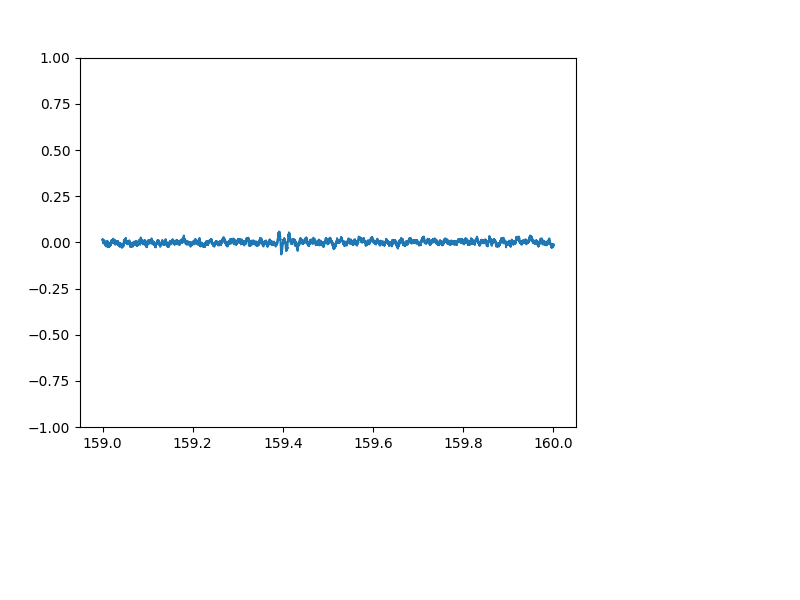

/home/dvh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


KeyboardInterrupt: 

In [53]:
%matplotlib notebook
CHUNK = 1024
FORMAT = pyaudio.paFloat32
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 600


x = np.arange(0,1,1/(int(RATE / CHUNK)*1024))
# x = np.arange(0,1,1/1024)
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()
fig.canvas.draw()

p = pyaudio.PyAudio()
stream = p.open(format=FORMAT, channels=CHANNELS,rate=RATE, input=True, frames_per_buffer=CHUNK)

frames = []


for i in range(0, int(RECORD_SECONDS)):
    signal = []
    for j in range(0, int(RATE / CHUNK)):
        data = stream.read(CHUNK)      
        
        frames.append(data)
        
        y = np.fromstring(data,dtype=np.float32)
        signal = np.concatenate((signal,y), axis=None)

    
    x = np.arange(i,i+1,1/(int(RATE / CHUNK)*1024))

    ax.clear()
    ax.plot(x,signal)
    ax.set_ylim([-1,1])    
    fig.canvas.draw() 
    


# for i in range(0, int(RATE / CHUNK* RECORD_SECONDS)):

#     data = stream.read(CHUNK)             
#     frames.append(data)
#     x = np.arange(i,i+1,1/1024)*CHUNK / RATE
#     y = np.fromstring(data,dtype=np.float32) 

#     ax.clear()
#     ax.plot(x, y)
#     ax.set_ylim([-1,1])
#     fig.canvas.draw()    

stream.stop_stream()
stream.close()
p.terminate()


In [17]:
max(y)

32767

In [20]:
x = np.arange(1,2,1/1024)